Written by Tushar Chandra - 2021211

### Q2



In [35]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df_g1 = pd.read_csv('G1.csv')
df_g2 = pd.read_csv('G2.csv')

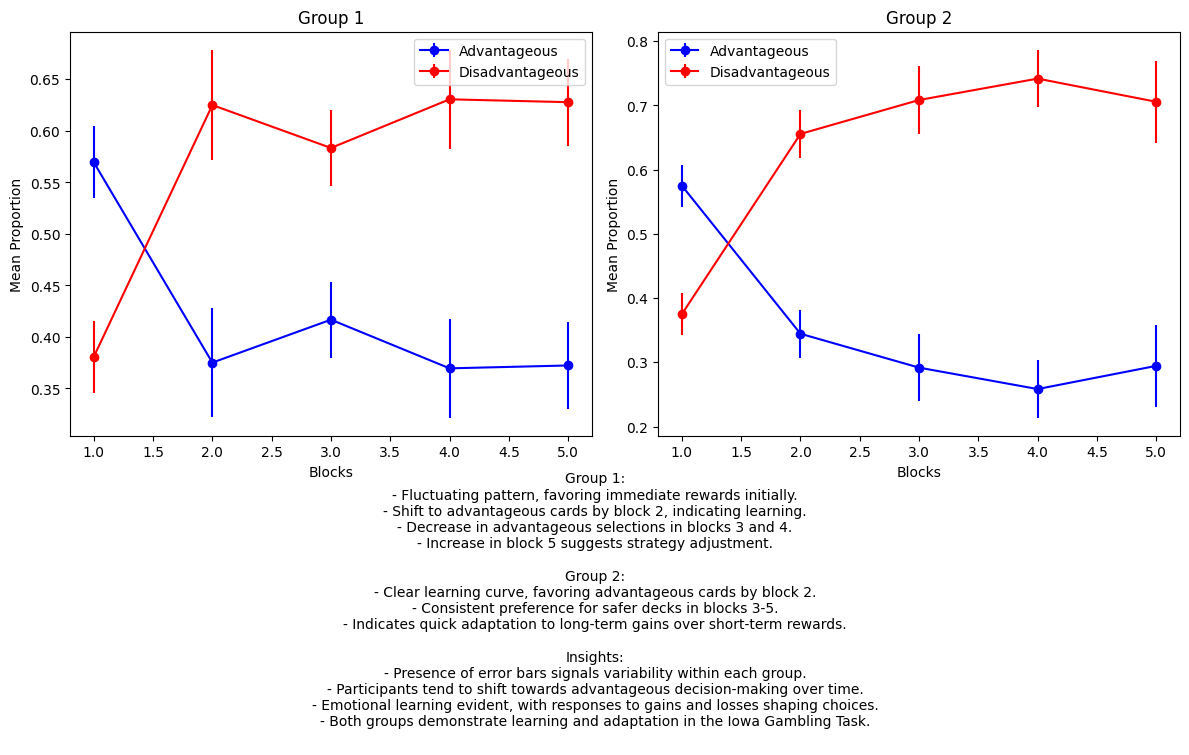

In [36]:
def meanError(df):
    blocks = 5
    blockSize = len(df.columns) // blocks

    meanAdv = []
    errorAdv = []
    meanDisadv = []
    errorDisadv = []

    for block in range(blocks):
        start = block * blockSize
        end = (block + 1) * blockSize

        data = df.iloc[:, start:end]
        advantageousCards = data[(data == 1) | (data == 2)].count(axis=1)
        disadvantageousCards = data[(data == 3) | (data == 4)].count(axis=1)

        meanAdv.append(advantageousCards.mean() / blockSize)
        errorAdv.append(advantageousCards.sem() / blockSize)
        meanDisadv.append(disadvantageousCards.mean() / blockSize)
        errorDisadv.append(disadvantageousCards.sem() / blockSize)

    return meanAdv, errorAdv, meanDisadv, errorDisadv

# Calculate means and errors for both groups
means_adv_g1, errors_adv_g1, means_disadv_g1, errors_disadv_g1 = meanError(df_g1)
means_adv_g2, errors_adv_g2, means_disadv_g2, errors_disadv_g2 = meanError(df_g2)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Group 1 subplot
axes[0].errorbar(range(1, 6), means_adv_g1, yerr=errors_adv_g1, marker='o', linestyle='-', color='blue', label='Advantageous')
axes[0].errorbar(range(1, 6), means_disadv_g1, yerr=errors_disadv_g1, marker='o', linestyle='-', color='red', label='Disadvantageous')
axes[0].set_title('Group 1')
axes[0].set_xlabel('Blocks')
axes[0].set_ylabel('Mean Proportion')
axes[0].legend()

# caption_g1 = """
# **Group 1 Insights:**
# - Fluctuating pattern, favoring immediate rewards initially.
# - Shift to advantageous cards by block 2, indicating learning.
# - Decrease in advantageous selections in blocks 3 and 4.
# - Increase in block 5 suggests strategy adjustment.
# """
# axes[0].text(0.5, -1, caption_g1, ha='center', va='center', fontsize=8)

# Group 2 subplot
axes[1].errorbar(range(1, 6), means_adv_g2, yerr=errors_adv_g2, marker='o', linestyle='-', color='blue', label='Advantageous')
axes[1].errorbar(range(1, 6), means_disadv_g2, yerr=errors_disadv_g2, marker='o', linestyle='-', color='red', label='Disadvantageous')
axes[1].set_title('Group 2')
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Mean Proportion')
axes[1].legend()

# caption_g2 = """
# **Group 2 Insights:**
# - Clear learning curve, favoring advantageous cards by block 2.
# - Consistent preference for safer decks in blocks 3-5.
# - Indicates quick adaptation to long-term gains over short-term rewards.
# """
# axes[1].text(0.5, 1, caption_g2, ha='center', va='center', fontsize=8)

# common_caption = (
#     'Insights: \n'
#     '- Presence of error bars signals variability within each group.\n'
#     '- Participants tend to shift towards advantageous decision-making over time.\n'
#     '- Emotional learning evident, with responses to gains and losses shaping choices.\n'
#     'Both groups demonstrate learning and adaptation in the Iowa Gambling Task.'
# )

# fig.text(0.5, -0.05, common_caption, ha='center', va='center', fontsize=8)

description = """










Group 1:
- Fluctuating pattern, favoring immediate rewards initially.
- Shift to advantageous cards by block 2, indicating learning.
- Decrease in advantageous selections in blocks 3 and 4.
- Increase in block 5 suggests strategy adjustment.

Group 2:
- Clear learning curve, favoring advantageous cards by block 2.
- Consistent preference for safer decks in blocks 3-5.
- Indicates quick adaptation to long-term gains over short-term rewards.

Insights:
- Presence of error bars signals variability within each group.
- Participants tend to shift towards advantageous decision-making over time.
- Emotional learning evident, with responses to gains and losses shaping choices.
- Both groups demonstrate learning and adaptation in the Iowa Gambling Task.
"""

fig.text(0.5, -0.05, description, ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

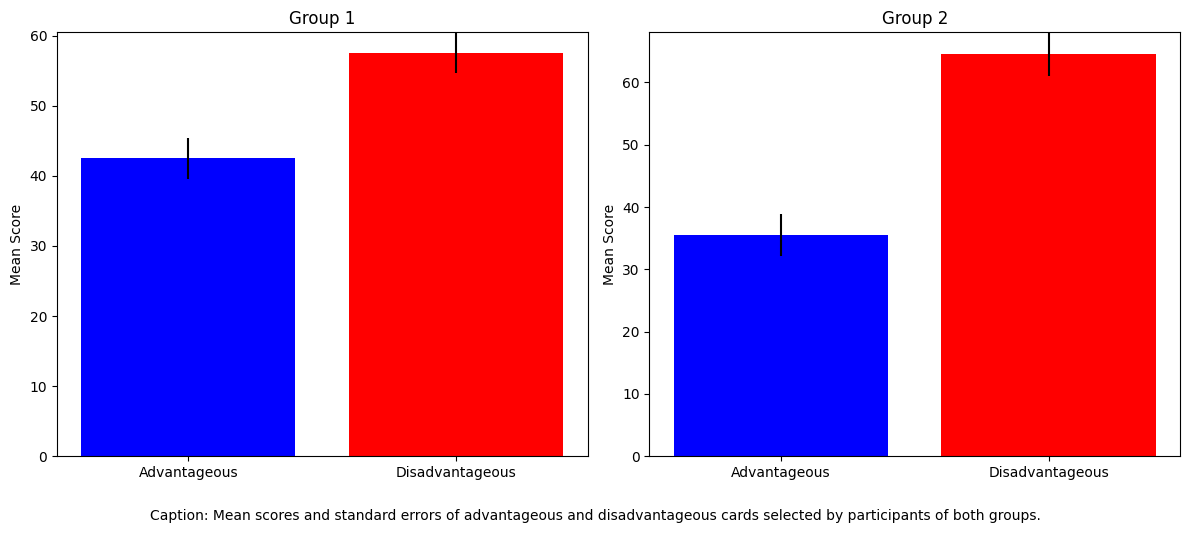

In [37]:
def meanError(df):
    advantageousCards = df[(df == 1) | (df == 2)].count(axis=1)
    disadvantageousCards = df[(df == 3) | (df == 4)].count(axis=1)

    meanAdv = advantageousCards.mean()
    errorAdv = advantageousCards.sem()
    meanDisadv = disadvantageousCards.mean()
    errorDisadv = disadvantageousCards.sem()

    return meanAdv, errorAdv, meanDisadv, errorDisadv

# Calculate means and errors for both groups
meanAdvG1, errorAdvG1, meanDisadvG1, errorDisadvG1 = meanError(df_g1)
mean_adv_g2, error_adv_g2, mean_disadv_g2, error_disadv_g2 = meanError(df_g2)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Group 1 subplot
axes[0].bar(['Advantageous', 'Disadvantageous'], [meanAdvG1, meanDisadvG1], yerr=[errorAdvG1, errorDisadvG1], color=['blue', 'red'])
axes[0].set_title('Group 1')
axes[0].set_ylabel('Mean Score')
axes[0].set_ylim([0, max(meanAdvG1, meanDisadvG1) + max(errorAdvG1, errorDisadvG1) + 0.1])

# Group 2 subplot
axes[1].bar(['Advantageous', 'Disadvantageous'], [mean_adv_g2, mean_disadv_g2], yerr=[error_adv_g2, error_disadv_g2], color=['blue', 'red'])
axes[1].set_title('Group 2')
axes[1].set_ylabel('Mean Score')
axes[1].set_ylim([0, max(mean_adv_g2, mean_disadv_g2) + max(error_adv_g2, error_disadv_g2) + 0.1])

# Adding caption
fig.text(0.5, -0.05, 'Caption: Mean scores and standard errors of advantageous and disadvantageous cards selected by participants of both groups.', ha='center')

plt.tight_layout()
plt.show()

In [49]:
import numpy as np
import scipy.stats as stats

def meanError(df):
    blocks = 5
    blockSize = len(df.columns) // blocks

    meanAdv = []
    errorAdv = []
    meanDisadv = []
    errorDisadv = []

    for block in range(blocks):
        start = block * blockSize
        end = (block + 1) * blockSize

        data = df.iloc[:, start:end]
        advantageousCards = data[(data == 1) | (data == 2)].count(axis=1)
        disadvantageousCards = data[(data == 3) | (data == 4)].count(axis=1)

        meanAdv.append(advantageousCards.mean() / blockSize)
        errorAdv.append(advantageousCards.sem() / blockSize)
        meanDisadv.append(disadvantageousCards.mean() / blockSize)
        errorDisadv.append(disadvantageousCards.sem() / blockSize)

    return meanAdv, errorAdv, meanDisadv, errorDisadv

# Calculating means and errors for both groups
meanAdvG1, errorAdvG1, meanDisadvG1, errorDisadvG1 = meanError(df_g1)
meanAdvG2, errorAdvG2, meanDisadvG2, errorDisadvG2 = meanError(df_g2)

alpha = 0.05

# Checking for normality assumption (Shapiro-Wilk test)
_, p_valueNormalityG1 = stats.shapiro(df_g1.values.flatten())
_, p_valueNormalityG2 = stats.shapiro(df_g2.values.flatten())

print("Result: ")

# Performing t-test if normality assumption is met
if p_valueNormalityG1 > alpha and p_valueNormalityG2 > alpha:
    # Performing independent t-test
    t_statistic, p_value_ttest = stats.ttest_ind(df_g1.values.flatten(), df_g2.values.flatten(), equal_var=False)

    # Calculating degrees of freedom (d.o.f.)
    df = len(df_g1.values.flatten()) + len(df_g2.values.flatten()) - 2

    # Calculating confidence interval
    mean_diff = np.mean(df_g1.values.flatten()) - np.mean(df_g2.values.flatten())
    std_pooled = np.sqrt(((len(df_g1.values.flatten()) - 1) * np.std(df_g1.values.flatten(), ddof=1)**2 + (len(df_g2.values.flatten()) - 1) * np.std(df_g2.values.flatten(), ddof=1)**2) / (len(df_g1.values.flatten()) + len(df_g2.values.flatten()) - 2))
    margin_of_error = stats.t.ppf(1 - alpha / 2, df) * std_pooled * np.sqrt(1 / len(df_g1.values.flatten()) + 1 / len(df_g2.values.flatten()))
    confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

    # Calculating effect size (Cohen's d)
    pooled_std = np.sqrt((np.std(df_g1.values.flatten(), ddof=1)**2 + np.std(df_g2.values.flatten(), ddof=1)**2) / 2)
    effect_size = mean_diff / pooled_std

    # Printing results
    print(f"Independent t-test results:")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value_ttest}")
    print(f"Degrees of freedom: {df}")
    print(f"95% Confidence Interval for the Difference of Means: {confidence_interval}")
    print(f"Effect Size (Cohen's d): {effect_size}")

else:
    # Performing Mann-Whitney U test
    u_statistic, p_value_mannwhitney = stats.mannwhitneyu(df_g1.values.flatten(), df_g2.values.flatten())

    # Printing results
    print(f"Mann-Whitney U test results:")
    print(f"p-value: {p_value_mannwhitney}")
    print(f"U-statistic: {u_statistic}")


Result: 
Mann-Whitney U test results:
p-value: 0.691533448276711
U-statistic: 1792010.0


The Mann-Whitney U test results indicate that there is no significant difference between the two groups in terms of the decision-making ability. The p-value of 0.6915 is greater than the common significance level of 0.05, suggesting that we do not have enough evidence to reject the null hypothesis that there is no difference between the groups.

Interpretation:

The Mann-Whitney U test did not find a statistically significant difference in decision-making performance between the two groups.
This suggests that, based on the Iowa Gambling Task, the decision-making abilities of Group 1 and Group 2 are similar.
The lack of a significant difference implies that both groups may exhibit comparable strategies or patterns in their choices during the task.